# Merkezi Limit Teoremi

Merkezi Limit Teoremi (CLT), popülasyon dağılımının şekli ne olursa olsun, seçilen örneklemin büyüklüğü büyüdükçe, örneklemlerin ortalamalarının örneklem dağılımının (sampling distribution) normal bir dağılıma yaklaştığını belirtir. Bu teorem özellikle 30'un üzerindeki örneklem boyutları için geçerlidir. Diğer bir deyişle, $\overline{X} \sim Normal \left(\mu, \dfrac{\sigma^2}{n} \right)$

## CLT Simülasyonu

İlk olarak, ortalaması 181 ve standart sapması 24 olan bir kitle (popülasyon) oluşturalım ve bu popülasyonun dağılım grafiğini `seaborn` paketini kullanarak çizelim.

**NOT**: Ben burada kitle dağılımını normal dağılım olarak seçtim. Siz istediğiniz bir sürekli dağılımı kullanabilirsiniz.

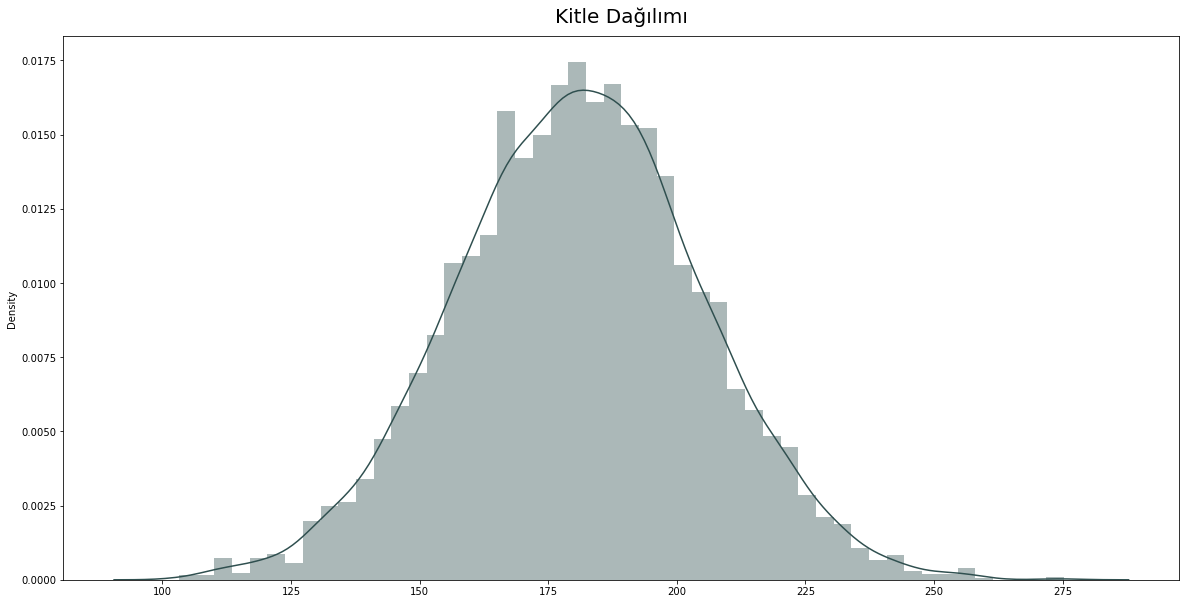

In [1]:
# Gerekli kütüphaneleri içe aktaralım
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

np.random.seed(42) 

# Normal dağılım kullanarak, ortalaması 181, standart sapması 24 olan
# 6,000 gözlemden oluşan bir kitle üretelim.
population = np.random.normal(loc=181, scale=24, size=6000)


pop_mean = population.mean()
#180.92508820056628

pop_std = population.std()
#23.959903286074418

fig = plt.figure(figsize=(20, 10))
sns.distplot(population, color="darkslategrey")
plt.title("Kitle Dağılımı", y=1.015, fontsize=20);
plt.savefig('population_distribution.png')
plt.show()

Bu kitleden 35 büyüklüğünde ($n=35$), yerine koyarak 300 tane rastgele örneklem alalım ve her örneklemin aritmetik ortalamasını ($\overline{X}$) hesaplayalım.

In [2]:
sample_means = [] # örneklemlerin ortalamalarını saklamak için boş bir liste
n = 35
for sample in range(0, 300): #Döngüyü 300 defa tekrarla
    sample_values = np.random.choice(population, size=n) # Kitleden, yerine koyarak n=35 büyüklüğünde örneklemler seç
    sample_mean = np.mean(sample_values) #Seçilen bu örneklemin ortalamasını hesapla
    sample_means.append(sample_mean) # Bu örneklemin ortalamasını sample_means isimli listede sakla

In [3]:
len(sample_means)

300

Döngü sonunda, görüldüğü üzere 300 tane örneklemin örneklem ortalaması var elimizde. 300 tane örneklemin örneklem ortalamalarından oluşan bu verinin grafiğini çizelim.

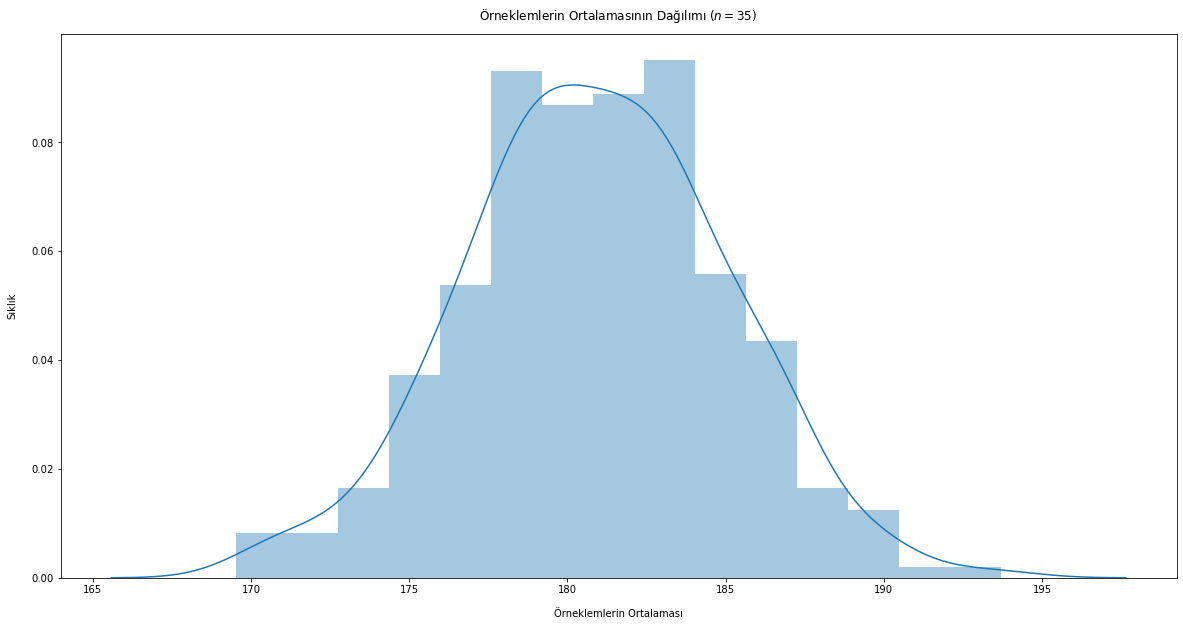

In [4]:
fig = plt.figure(figsize=(20, 10))
sns.distplot(sample_means)
plt.title("Örneklemlerin Ortalamasının Dağılımı ($n=35$)", y=1.015, fontsize=12)
plt.xlabel("Örneklemlerin Ortalaması", labelpad=14)
plt.ylabel("Sıklık", labelpad=14);
plt.savefig('distribution_of_sample_means.png')
plt.show()

Kolayca anlaşılacağı gibi, örneklemlerin ortalamaların dağılımı grafiksel olarak Normal dağılıma benzediği için Merkezi Limit Teoremini doğru bir şekilde ispatlamış olduk.

Şimdi bu örneklem ortalamalarının ortalamasını ve standart sapmasını (yani standart hatasını) hesaplayalım:

In [5]:
mean_of_sample_means = np.mean(sample_means)
print(mean_of_sample_means)
# 180.88531324062302

variance_of_sample_means = np.var(sample_means)
print(variance_of_sample_means)
# 16.87586050913635

180.88531324062302
16.87586050913635


In [6]:
standard_deviation_of_sample_means = np.sqrt(variance_of_sample_means)
print(standard_deviation_of_sample_means)
# 4.1080239177902005

4.1080239177902005


Kitlenin ortalaması 181'dir. Örneklemlerin ortalamaların ortalaması da yaklaşık 181 olarak bulundu (tam olarak 180.88531324062302).

Benzer şekilde, kitlenin standart sapması 24'tür. Örneklemlerin ortalamaların standart sapması yaklaşık 4.1080239177902005 olarak elde edildi. Varyans, standart sapmanın karesidir. O halde, örneklemlerin ortalamaların varyansı, $(4.1080239177902005)^2 = 16.87586050913635$'tir.

Bu değer, kitle varyansının yansız bir tahmincisidir.

$V\left( \overline{X} \right) = \dfrac{\sigma^2}{n}$ olduğu Merkezi Limit Teoremi ile verilmiştir. O halde:

In [7]:
(24**2)/35

16.457142857142856

Görüldüğü üzere, simülasyon sonucu elde edilen değer ile, Merkezi Limit Teoremi'nin söylediği değer birbirine çok yakındır.